# 🕸️ Scrapify

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YonaniCodes/Scrapify/blob/main/notebooks/scrapify-demo.ipynb) -->


In [ ]:
import json

def clean_widget_metadata(nb_path, output_path=None):
    with open(nb_path, 'r', encoding='utf-8') as f:
        notebook = json.load(f)

    if 'widgets' in notebook.get('metadata', {}):
        del notebook['metadata']['widgets']

    output_path = output_path or nb_path
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(notebook, f, indent=2)

# Example usage: download your notebook first, then clean and fix it
# clean_widget_metadata('/content/your_notebook.ipynb')


In [ ]:


!ls
# !jupyter nbconvert --to html scrapify_demo.ipynb


LICENSE  notebooks  README.md  requirements.txt  src


In [3]:
import sys
import os

# Verify we're running in Colab - exit if not
try:
    import google.colab
except ImportError:
    raise RuntimeError("This script is designed to run only in Google Colab")

# Define repo details
repo_url = "https://github.com/YonaniCodes/Scrapify.git"
repo_path = "/content/Scrapify"

# Clone or update the repository
if not os.path.exists(repo_path):
    !git clone {repo_url} {repo_path}
else:
    %cd {repo_path}
    !git stash  # Stash any local changes
    !git pull

# Add src/ to Python path
sys.path.append(f"{repo_path}/src")

# Import the scraper function (replace with actual import)
# from scraper_module import scrape_function
!pip install -r requirements.txt
!pip install PyMuPDF


/content/Scrapify
No local changes to save
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (8/8), 1.55 KiB | 88.00 KiB/s, done.
From https://github.com/YonaniCodes/Scrapify
   c85af37..62ec2aa  main       -> origin/main
Updating c85af37..62ec2aa
Fast-forward
 notebooks/scrapify_demo.ipynb | 71 +++++++++++++++++++++++++++++++++----------
 1 file changed, 55 insertions(+), 16 deletions(-)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could 

In [ ]:
import subprocess

# Get output of ls command
output = subprocess.check_output("ls", shell=True).decode().splitlines()

# Now you can conditionally check
if "firebase-adminsdk.json" in output:
    print("Everything is ready you can start working 🎉🎉🎉🎉")
else:
    print("firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file")

firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file


In [ ]:
import sys
sys.path.append('/content/Scrapify/src')

In [ ]:
from scrapify import scrape
from scrapify import get_report
from preprocessing import normalize_amharic

import pandas as pd

## Steps to Scrape a website

1. Install the  `googlesearch-python` module
2. Define a function that takes two arguments `num_urls` and `search_query`. and return list of urls
3. call the `scrape` method by passing list of `urls` and `your_name` as a second paramete (optional).

In [ ]:
!pip install googlesearch-python

In [ ]:
from googlesearch import search

def get_links_from_simple_search(query, num_results):
    """
    Retrieves URLs from a simple Google search.

    Args:
        query (str): The search query.
        num_results (int): The desired number of search results. This is not directly supported by googlesearch,
                          so it will be used to limit the results after fetching.

    Returns:
        list: A list of URLs.
    """
    # Fetch the search results
    search_results = search(query, num_results=num_results)
    # Convert the generator object to a list
    urls = list(set(search_results))
    return urls

We need a function to filter if the url is already scraped we dont wanna send reques to our backend everyurl that is returned by the function `get_links_from_simple_search`

In [ ]:
def filter_url(urls):
# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
  scraped,unscrape=get_report()
  scraped_data= pd.DataFrame(scraped)
  unscraped_data= pd.DataFrame(unscrape)
  filtered_urls = []
  for url in urls:
      # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
      if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
          filtered_urls.append(url)
  return filtered_urls

# **Lets visualize our scraping status**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_scraping_report():
    """
    Generate a pie chart showing the ratio of scraped to unscraped URLs.
    Uses get_report() internally to fetch the data.
    """
    # Get the data
    scraped, unscraped = get_report()

    # Convert to DataFrames
    scraped_data = pd.DataFrame(scraped)
    unscraped_data = pd.DataFrame(unscraped)

    # Calculate counts
    scraped_count = len(scraped_data['url'])
    unscraped_count = len(unscraped_data['url'])

    # Prepare data for visualization
    labels = ['Scraped URLs', 'Unscraped URLs']
    sizes = [scraped_count, unscraped_count]
    colors = ['salmon', 'lightblue']  # Green and red

    # Create the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(sizes,
           labels=labels,
           colors=colors,
           autopct=lambda p: f'{p:.1f}%\n({int(p/100*sum(sizes))})',
           startangle=90,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
           textprops={'fontsize': 12})

    ax.set_title('Scraping Report: Scraped vs Unscraped URLs', pad=20, fontsize=14)
    plt.tight_layout()




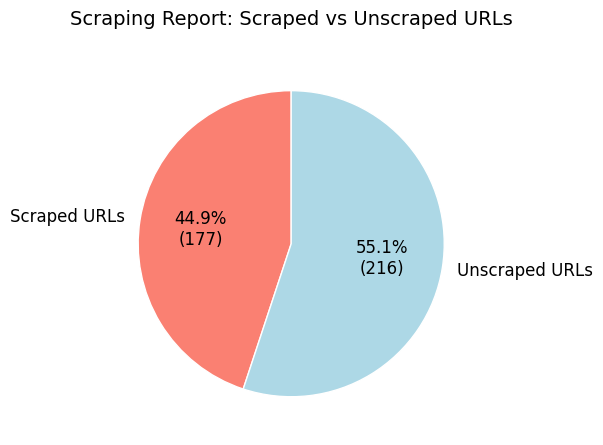

In [ ]:
# Example usage:
plot_scraping_report()

### Normalizing our data


In order to normalize our well define
1. deffine a function `read_jsonl_content` to read jsoln file
2. normalize the text returned using `normalize_and_save_data`
3. Finall define the wraper function `normalize_jsonl_file`



In [ ]:
import json

def read_jsonl_content(file_path, content_key='content'):
    """Returns a list of 'content' values from a .jsonl file."""
    content_values = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            stripped_line = line.strip()
            if stripped_line:
                record = json.loads(stripped_line)
                content_values.append(record[content_key])

    print(f"Read {len(content_values)} records from {file_path}.")
    return content_values  # Example: ["text1", "text2", ...]

In [ ]:
def normalize_and_save_data(jsonl_data, file_path):
    """Writes all JSONL entries as one continuous text blob."""
    with open(file_path, 'w', encoding='utf-8') as f:
        all_text = " ".join(normalize_amharic(text) for text in jsonl_data)  # No newlines
        f.write(all_text)

In [ ]:
def normalize_jsonl_file(input_file, output_file):
  jsonl_data=read_jsonl_content(test_file_path)
  normalize_and_save_data(jsonl_data, destination_file_path)

How to normalize data?

1. define `test_file_path` the jsonl file is found.
2. define `destination` you want to store the normaliez text file
3. call the function `normalize_and_save_data  ` with the two parameters
4. finnally call the wraper function

In [ ]:
test_file_path = '/content/Scrapify/extracted_data.jsonl'
destination_file_path = '/content/Scrapify/normalized.txt'

normalize_jsonl_file(test_file_path, destination_file_path)


Read 5 records from /content/Scrapify/extracted_data.jsonl.


### Chunking the data. now is the time to chunk all the data.

In [ ]:
import os
import os
import shutil
from google.colab import files

def read_normalized_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()


def chunk_text(text, chunk_size=1000, chunk_overlap=20):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start = end - chunk_overlap
    return chunks


def save_chunks_as_files(chunks: list[str], output_dir: str, base_filename: str = "chunk"):
    """
    Saves each text chunk as an individual .txt file.

    Args:
        chunks: List of text chunks (strings)
        output_dir: Directory to save the files
        base_filename: Prefix for filenames (default: "chunk")

    Returns:
        List of paths to the created files
    """
    os.makedirs(output_dir, exist_ok=True)  # Create dir if it doesn't exist
    saved_paths = []

    for i, chunk in enumerate(chunks, start=1):
        # Format: "{output_dir}/chunk_1.txt", "{output_dir}/chunk_2.txt", etc.
        file_path = os.path.join(output_dir, f"{base_filename}_{i}.txt")

        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(chunk)
        saved_paths.append(file_path)

    print(f"Saved {len(saved_paths)} files:")
    for path in saved_paths[:10]:
      print(f"→ {path}")


def zip_chunks_folder(folder_path):
    zip_file_path = f"{folder_path}.zip"
    shutil.make_archive(folder_path, 'zip', folder_path)
    return zip_file_path



In [ ]:
import datetime
normalized_file_path = '/content/Scrapify/normalized.txt'
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
destination_file_path = f'/content/Scrapify/chunks{timestamp}'
text=read_normalized_text(normalized_file_path)
chunks=chunk_text(text)
save_chunks_as_files(chunks,destination_file_path)





Saved 1016 files:
→ /content/Scrapify/chunks20250415_101226/chunk_1.txt
→ /content/Scrapify/chunks20250415_101226/chunk_2.txt
→ /content/Scrapify/chunks20250415_101226/chunk_3.txt
→ /content/Scrapify/chunks20250415_101226/chunk_4.txt
→ /content/Scrapify/chunks20250415_101226/chunk_5.txt
→ /content/Scrapify/chunks20250415_101226/chunk_6.txt
→ /content/Scrapify/chunks20250415_101226/chunk_7.txt
→ /content/Scrapify/chunks20250415_101226/chunk_8.txt
→ /content/Scrapify/chunks20250415_101226/chunk_9.txt
→ /content/Scrapify/chunks20250415_101226/chunk_10.txt
→ /content/Scrapify/chunks20250415_101226/chunk_11.txt
→ /content/Scrapify/chunks20250415_101226/chunk_12.txt
→ /content/Scrapify/chunks20250415_101226/chunk_13.txt
→ /content/Scrapify/chunks20250415_101226/chunk_14.txt
→ /content/Scrapify/chunks20250415_101226/chunk_15.txt
→ /content/Scrapify/chunks20250415_101226/chunk_16.txt
→ /content/Scrapify/chunks20250415_101226/chunk_17.txt
→ /content/Scrapify/chunks20250415_101226/chunk_18.txt
→

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chunks folder zipped and ready for download: /content/Scrapify/chunks20250415_101226.zip


## Downloading the chunks

In [ ]:
zip_file_path = zip_chunks_folder(destination_file_path)
files.download(zip_file_path)

print(f"Chunks folder zipped and ready for download: {zip_file_path}")


##Uploading chunks

In [ ]:
# prompt: a function which uploads chunck zip file and unzip it and return array of chunks

import zipfile
import os
from google.colab import files

def upload_and_unzip_chunks(zip_file_path):
    """
    Uploads a zip file containing text chunks, unzips it, and returns a list of chunk file paths.

    Args:
        zip_file_path: The path to the uploaded zip file.

    Returns:
        A list of strings, where each string is the path to an unzipped chunk file.
        Returns an empty list if the upload or unzipping fails.
    """
    try:
        uploaded = files.upload()
        if zip_file_path not in uploaded:
            print(f"Error: File '{zip_file_path}' not found in the uploaded files.")
            return []

        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall('/tmp/chunks')  # Extract to a temporary directory

        chunk_files = []
        for filename in os.listdir('/tmp/chunks'):
            if filename.endswith(".txt"):  # Assuming chunks are text files
                chunk_files.append(os.path.join('/tmp/chunks', filename))
        return chunk_files

    except Exception as e:
        print(f"An error occurred: {e}")
        return []


## Code to generate vector embedding

In [ ]:
# Install sentence-transformers if you don't have it installed already
# pip install sentence-transformers

from sentence_transformers import SentenceTransformer

# Load the multilingual SBERT model
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

# Sample text chunks (this could be sentences or paragraphs from your text)
chunks = [
    "The cat jumped over the fence.",
    "A dog is playing in the park.",
    "Elephants are the largest land animals.",
    "Cats are often playful and curious."
]

# Generate embeddings for the chunks
vectors = model.encode(chunks, show_progress_bar=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.56k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

## Similarity Check

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between all embeddings
similarities = cosine_similarity(vectors)

# Example: Checking similarity between the first chunk and the second chunk
print(f"Cosine similarity between chunk 0 and chunk 1: {similarities[0][1]}")

# Example: Checking similarity between the first chunk and the third chunk
print(f"Cosine similarity between chunk 0 and chunk 2: {similarities[0][2]}")


NameError: name 'vectors' is not defined

In [ ]:
tydfv9y7ouibnm,o]p[l;]k cvk:L|gnzfhmxgjv.